Logistic Regression은 True/False와 같은 Binary나 복수개의 다항 분류에 쓰인다.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [5]:
tf.random.set_seed(777)
print(tf.__version__)

2.3.1


# Data

In [6]:
x_train = [[1.,2.],
           [2.,3.],
           [3.,1.],
           [4.,3.],
           [5.,3.],
           [6.,2.]]
y_train = [[0.],[0.],[0.],[1.],[1.],[1.]]

x_test = [[5.,2.]]
y_test = [[1.]]

In [7]:
x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

Text(0, 0.5, 'x2')

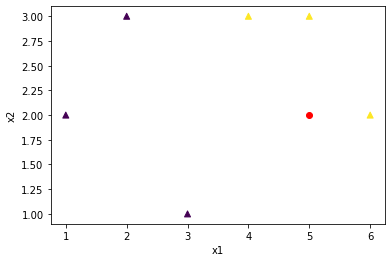

In [9]:
colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2,c=colors,marker='^')
plt.scatter(x_test[0][0],x_test[0][1],c='red')

plt.xlabel('x1')
plt.ylabel('x2')

# Tensorflow Eager

위 Data를 기준으로 가설의 검증을 통해 Logistic Classification 모델을 만들도록 하겠습니다.
 * Tensorflow data API를 통해 학습시킬 값들을 담는다. (Batch Size는 한번에 학습시킬 Size로 정한다.)
 * features, labels는 실재 학습에 쓰일 Data(연산을 위해 Type를 맞춘다.)

In [10]:
dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(len(x_train))

 * W와 b는 학습을 통해 생성되는 모델에 쓰이는 Weight와 Bias(초기값을 Variable : 0 이나 Random 값으로 가능. tf.random_normal([2,1]))

In [11]:
W = tf.Variable(tf.zeros([2,1]),name='weight')
b = tf.Variable(tf.zeros([1]),name='bias')

Sigmoid 함수를 가설로 선언한다.
 * Sigmoid는 아래 그래프와 같이 0과 1의 값만을 리턴합니다. tf.sigmoid(tf.matmul(X,W) + b)와 같습니다.

<img src="https://latex.codecogs.com/gif.latex?sigmoid(x)=\frac{1}{1&plus;e^{-x}}" title="sigmoid(x)=\frac{1}{1+e^{-x}}" />

In [38]:
logg_list = []
for k in range(-6,8,2):
    tmp_value = 1/(1+np.exp(-k))
    logg_list.append(tmp_value)

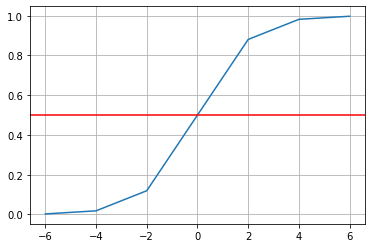

In [39]:
plt.plot(range(-6,8,2),logg_list)
plt.grid(b=True)
plt.axhline(0.5,color='red')

In [13]:
def logistic_regression(features):
    hypothesis = tf.divide(1.,1. + tf.exp(tf.matmul(features,W) + b))
    return hypothesis

가설을 검증할 Cost를 정의합니다.

<img src="https://latex.codecogs.com/gif.latex?Cost(h_\theta(x),y)&space;=&space;\begin{Bmatrix}&space;-log(h_\theta(x))\quad\quad\;\;\;&space;if\;y=1&space;\\&space;-log(1-h_\theta(x))\quad&space;if\;y=0&space;\end{Bmatrix}" title="Cost(h_\theta(x),y) = \begin{Bmatrix} -log(h_\theta(x))\quad\quad\;\;\; if\;y=1 \\ -log(1-h_\theta(x))\quad if\;y=0 \end{Bmatrix}" />

In [42]:
def loss_fn(hypothesis,features,labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1-labels) * tf.math.log(1-hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

추론한 값은 0.5를 기준(Sigmoid 그래프 참조)로 0과 1 값을 리턴합니다.
 * Sigmoid 함수를 통해 예측값이 0.5보다 크면 1을 반환하고, 0.5보다 작으면 0으로 반환합니다.
 * 가설을 통해 실재 값과 비교한 정확도를 측정합니다.

In [14]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5,dtype = tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,labels),dtype=tf.float32))
    return accuracy

Gradient Tape를 통해 경사값을 계산합니다.

In [15]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value,[W,b])

학습을 실행합니다.
 * 위의 Data를 Cost함수를 통해 학습시킨 후 모델을 생성합니다.
 * 새로운 Data를 통한 검증 수행 [5,2]의 Data로 테스트 수행(그래프상 1이 나와야 정상입니다.)

In [43]:
epochs = 1001

for step in range(epochs):
    for features, labels in iter(dataset):
        grads = grad(features,labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print('iter: {}, Loss: {:.4f}'.format(step,loss_fn(logistic_regression(features),features,labels)))

test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print('Testset Accuracy: {:.4f}'.format(test_acc))

iter: 0, Loss: 0.6874
iter: 100, Loss: 0.5776
iter: 200, Loss: 0.5349
iter: 300, Loss: 0.5054
iter: 400, Loss: 0.4838
iter: 500, Loss: 0.4671
iter: 600, Loss: 0.4535
iter: 700, Loss: 0.4420
iter: 800, Loss: 0.4319
iter: 900, Loss: 0.4228
iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000
